In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open('/Users/andreitudor/Desktop/Uncountable/Uncountable Front End Dataset.json', 'r') as file:
    data = json.load(file)

In [18]:
inputs, outputs = {}, {}
for exp_key, exp_value in data.items():
    for category, category_values in exp_value['inputs'].items():
        if category not in inputs:
            inputs[category] = []
        inputs[category].append(category_values)
    for category, category_values in exp_value['outputs'].items():
        if category not in outputs:
            outputs[category] = []
        outputs[category].append(category_values)

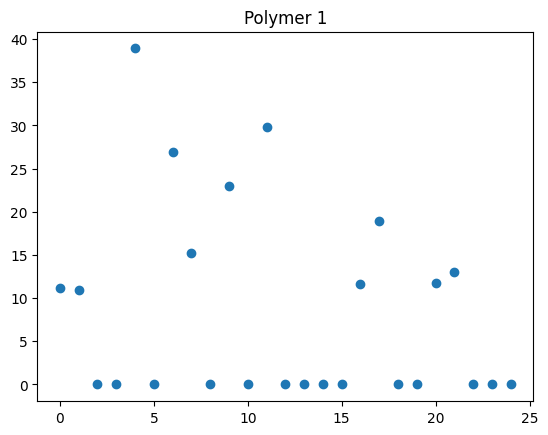

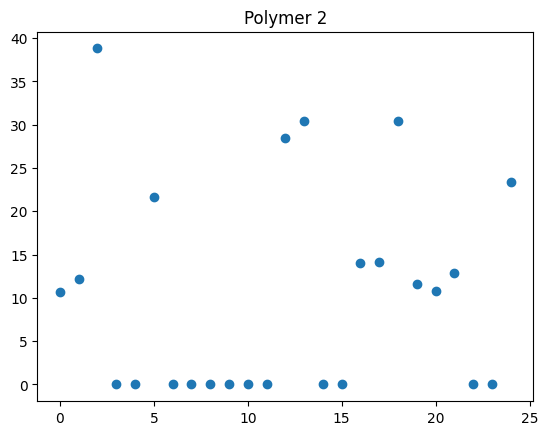

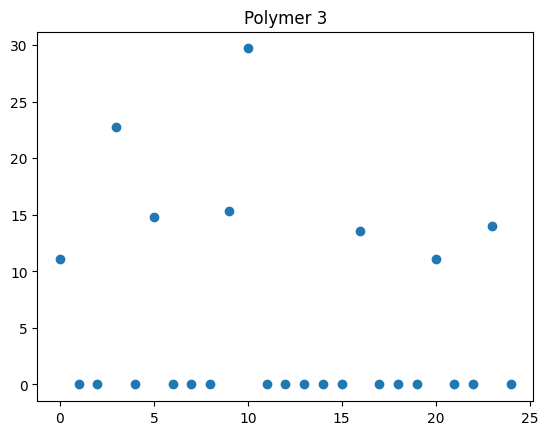

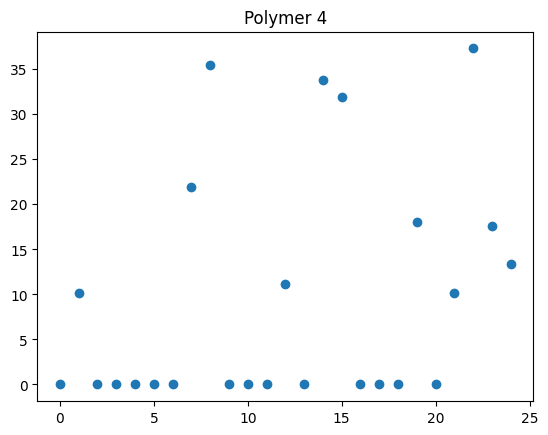

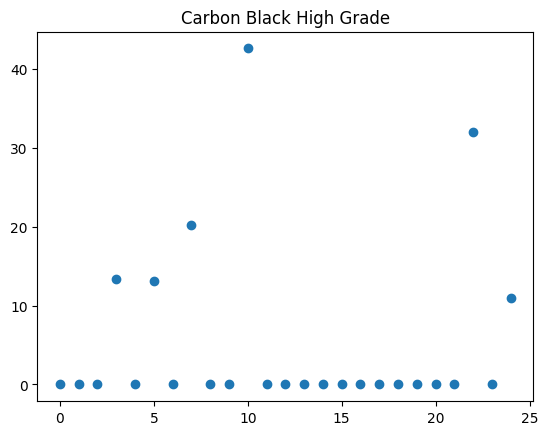

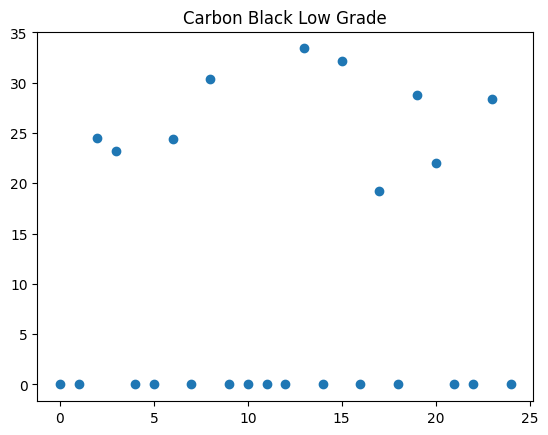

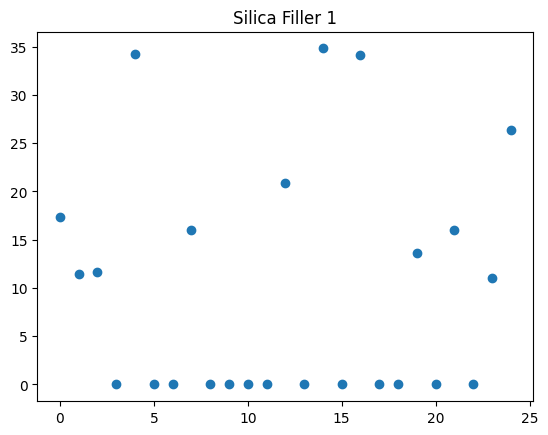

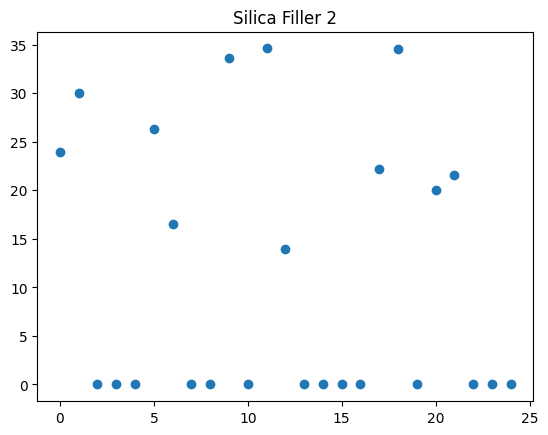

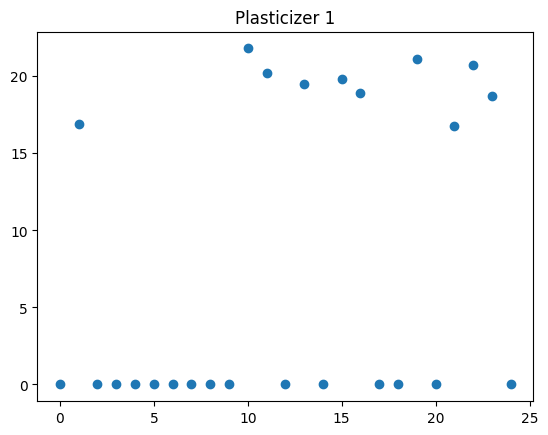

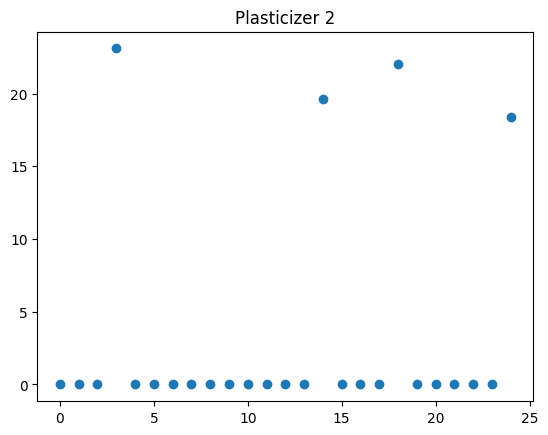

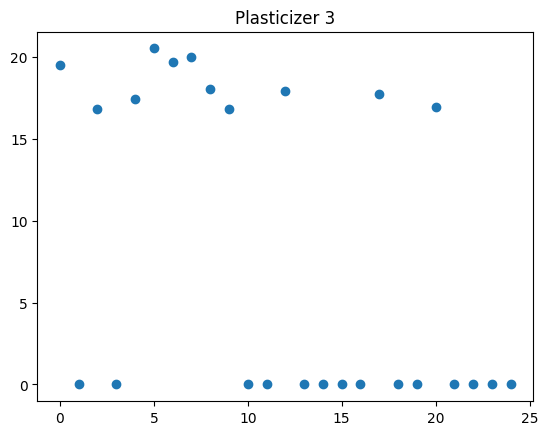

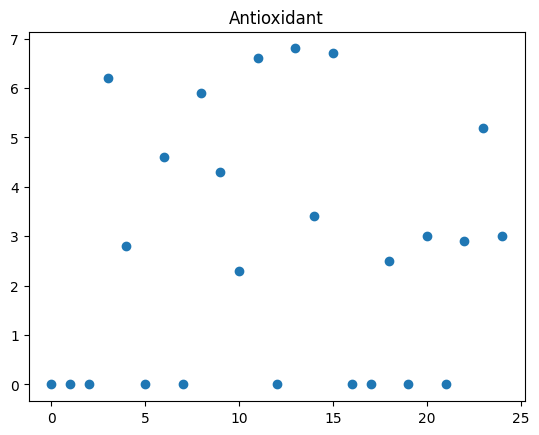

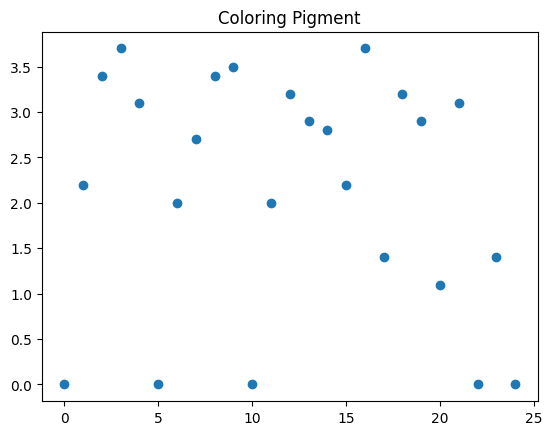

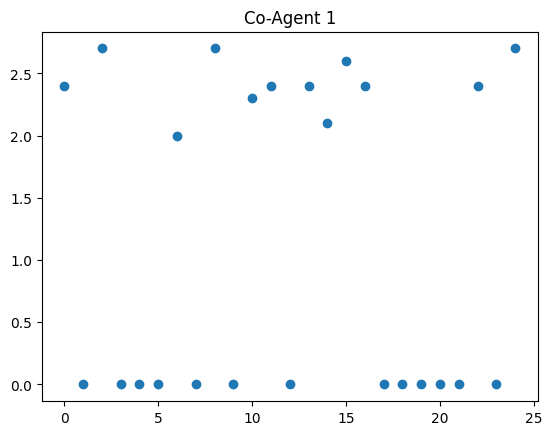

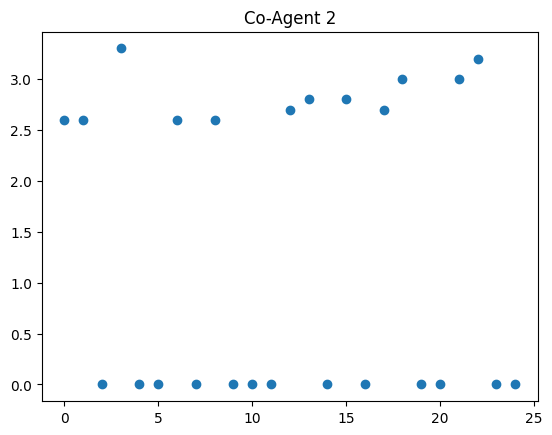

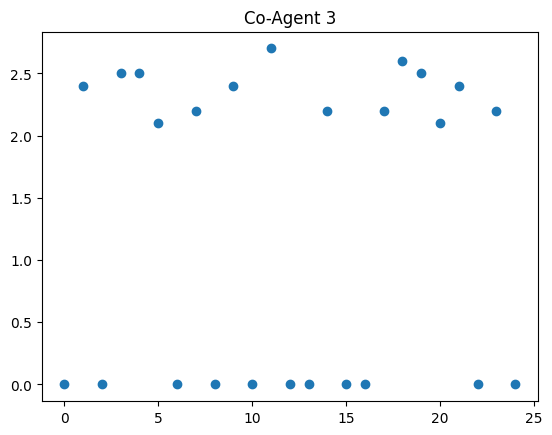

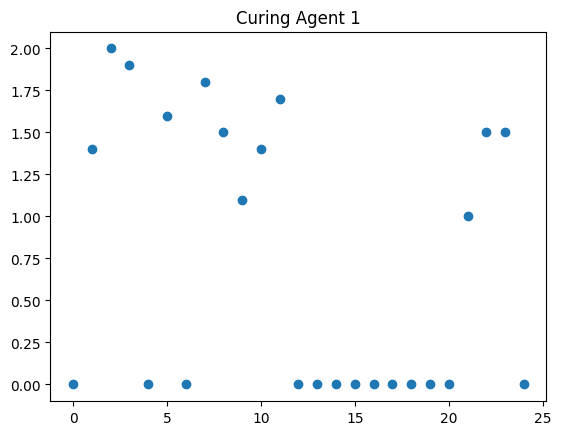

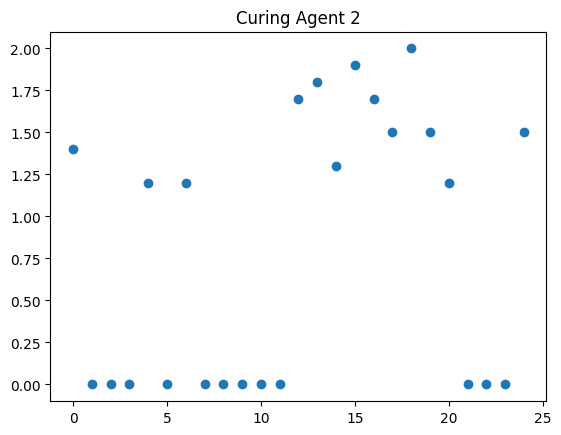

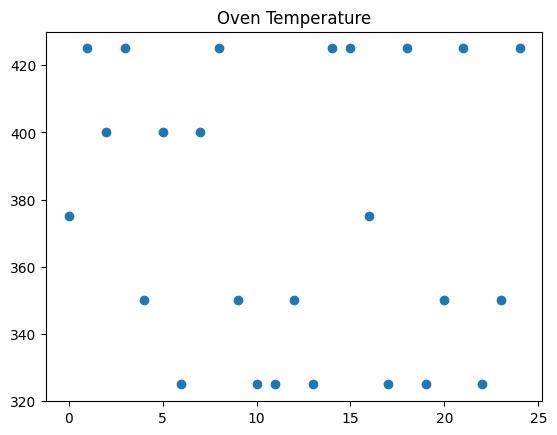

In [25]:
for name, values in inputs.items():
    plt.scatter(range(len(values)), values)
    plt.title(name)
    plt.show()

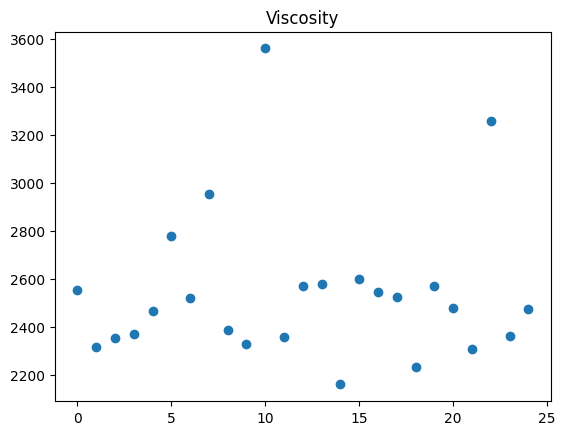

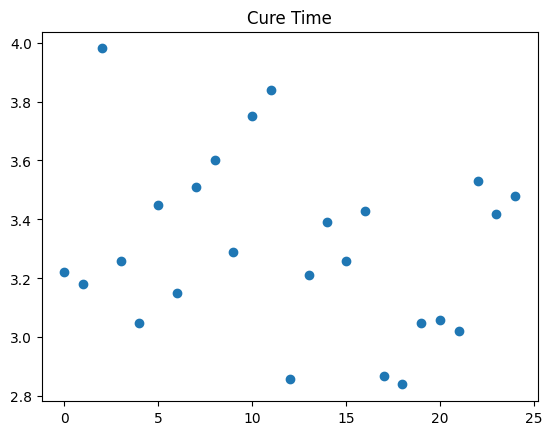

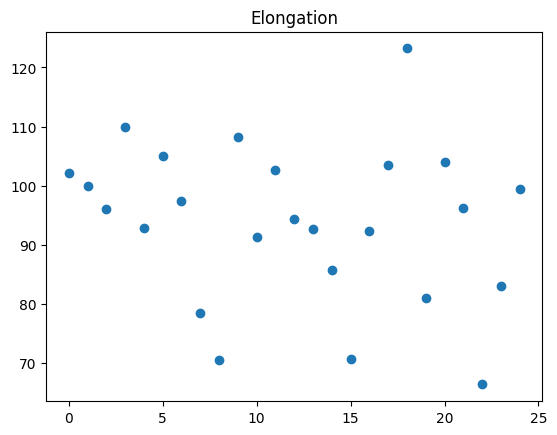

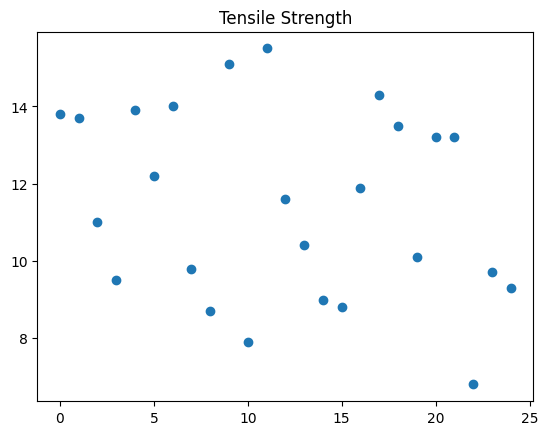

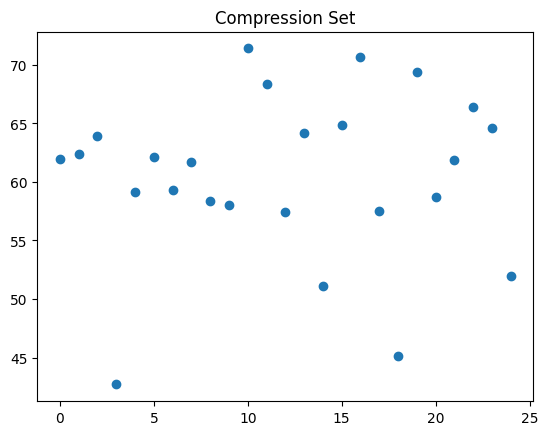

In [24]:
for name, values in outputs.items():
    plt.scatter(range(len(values)), values)
    plt.title(name)
    plt.show()

In [27]:
import sqlite3
import json

json_file_path = '/Users/andreitudor/Desktop/Uncountable/Uncountable Front End Dataset.json'

db_path = 'experiments.db'

def create_table_from_json(json_data, table_name):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    columns = ', '.join([f'[{column}] REAL' for column in json_data[list(json_data.keys())[0]][table_name].keys()])

    create_table_query = f'''
        CREATE TABLE IF NOT EXISTS {table_name} (
            experiment_name TEXT PRIMARY KEY,
            {columns}
        )
    '''

    cursor.execute(create_table_query)

    for experiment, data in json_data.items():
        experiment_data = data[table_name]

        columns = ', '.join(list(map(lambda x: f'[{x}]', list(experiment_data.keys()))))
        values = ', '.join(list(map(str, list(experiment_data.values()))))

        insert_query = f'''
            INSERT INTO {table_name} (experiment_name,{columns}) VALUES (
                "{experiment}", {values}
            )
        '''

        cursor.execute(insert_query)

    conn.commit()
    conn.close()

with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

create_table_from_json(json_data, 'inputs')
create_table_from_json(json_data, 'outputs')


IntegrityError: UNIQUE constraint failed: inputs.experiment_name